In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import compute_or_load_iou_matrix, estimate_beta_erm

In [5]:
# Load cached data
if not os.path.exists('../data'):
    os.system('gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz')
    os.system('tar -xf ../data.tar.gz -C ../')
    os.system('rm ../data.tar.gz')

data = np.load('../data/polyps/polyps-pranet.npz')
sgmd = data['sgmd']
gt_masks = data['targets']

# Setup
lam = 0
theta_grid = np.linspace(0, 1, 100)
n_bootstrap = 1000

# Precompute IOU matrix for all data
iou_matrix_full = compute_or_load_iou_matrix(sgmd, gt_masks, theta_grid, verbose=True)
n_total = len(iou_matrix_full)
print(f"Total samples: {n_total}")

Loaded IOU matrix from cache: 1798 images x 100 thetas
Total samples: 1798


In [ ]:
# Estimate beta for different values of n
n_values = [50, 100, 200, 500, 1000]
betas = []

for n in n_values:
    idx = np.random.choice(n_total, size=n, replace=False)
    iou_matrix_sample = iou_matrix_full[idx]
    beta = estimate_beta_erm(iou_matrix_sample, theta_grid, lam=lam, n_bootstrap=n_bootstrap, method='definition')
    betas.append(beta)
    print(f"n={n}: beta={beta}")

n=50: beta=0.0005753925705652168
n=100: beta=0.0006104662850363175
n=200: beta=0.00044836742877114877


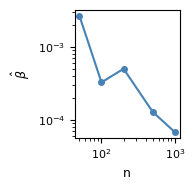

In [ ]:
# Plot beta vs n
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(n_values, betas, 'o-', color='steelblue', markersize=4, linewidth=1.5)
ax.set_xlabel('n', fontsize=9)
ax.tick_params(axis='both', labelsize=8)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal', 'box')
plt.tight_layout()
os.makedirs('./plots', exist_ok=True)
plt.savefig('./plots/iou_beta_vs_n.pdf', dpi=300, bbox_inches='tight')
plt.show()